In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geohash as gh

# read data
cyc = pd.read_csv(r'D:\thesis\data\train.csv')
new_cyc = cyc[['starttime','geohashed_start_loc']]
new_cyc['geo'] = new_cyc['geohashed_start_loc'].apply(lambda x: x[:6])

new_cyc2 = cyc[['starttime','geohashed_end_loc']]
new_cyc2['geo'] = new_cyc2['geohashed_end_loc'].apply(lambda x: x[:6])

c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
len(cyc)

3214096

In [4]:
cyc_test = pd.read_csv(r'D:\thesis\data\test.csv')
len(cyc_test)

2002996

In [5]:
len(np.unique(np.append(cyc.userid, cyc_test.userid)))

1065586

In [6]:
len(np.unique(np.append(cyc.bikeid, cyc_test.bikeid)))

516196

In [7]:
len(np.unique(cyc.userid))

349693

In [8]:
len(np.unique(cyc_test.userid))

972521

In [9]:
len(np.unique(cyc.bikeid))

485465

In [10]:
len(np.unique(cyc_test.bikeid))

440846

In [11]:
485465/349693

1.388260559976894

In [12]:
440846/972521

0.4533022937293899

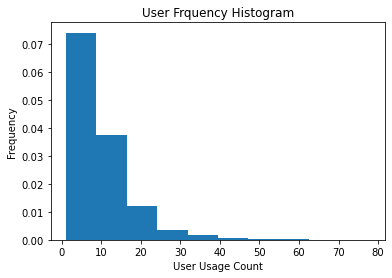

In [13]:
count_userid = cyc.groupby(by='userid').count()
plt.hist(count_userid['orderid'], density = True)
plt.title('User Frquency Histogram')
plt.xlabel('User Usage Count')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 2周内，用户平均使用次数
np.mean(count_userid['orderid'])

9.191193418226845

In [15]:
# 2周内，用户使用次数标准差
np.std(count_userid['orderid'])

8.017714513907121

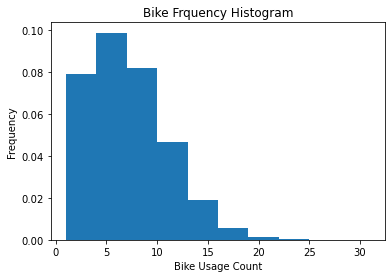

In [16]:
count_bikeid = cyc.groupby(by='bikeid').count()
plt.hist(count_bikeid['orderid'], density = True)
plt.title('Bike Frquency Histogram')
plt.xlabel('Bike Usage Count')
plt.ylabel('Frequency')
plt.show()

In [17]:
# 2周内， 单车平均使用次数
np.mean(count_bikeid['orderid'])

6.620654424108844

In [18]:
# 2周内， 单车使用次数标准差
np.std(count_bikeid['orderid'])

3.8523074812716636

In [19]:
new_cyc.head()

,starttime,geohashed_start_loc,geo
0,2017-05-14 22:16:50,wx4snhx,wx4snh
1,2017-05-14 22:16:52,wx4dr59,wx4dr5
2,2017-05-14 22:16:51,wx4fgur,wx4fgu
3,2017-05-14 22:16:51,wx4d5r5,wx4d5r
4,2017-05-14 22:16:50,wx4g27p,wx4g27


In [20]:
# data preprocessing functions
def structed_time(t):
    new_t = []

    for it in t:
        new_it = datetime.datetime.strptime(it, "%Y-%m-%d %H:%M:%S")  
        new_t.append(new_it)
    return new_t


def decode_geo(geo):
    lat_cen = []
    lon_cen = []

    for igeo in geo:
        icode = gh.decode_exactly(igeo)
        ilat_cen = icode[0]
        ilon_cen = icode[1]


        lat_cen.append(ilat_cen)
        lon_cen.append(ilon_cen)

    return lat_cen, lon_cen

def data_api(data, area_list, time_interval, label_side='left', closed_side='left'):
    # area should be the index, starttime should have been processed by datetime

    i = 1
    for area in area_list:
        one = data.loc[area]
        try:
            # if there is only 1 recorded data, the following code would report error
            onets = one.resample(time_interval, label=label_side, closed=closed_side, on='starttime').count()
            onets.columns = [area,'geohashed_start_loc','geo']
            onets = onets[area]
        except TypeError:
            continue
        else:
            if i == 1:
                rst = onets
            else:
                rst = pd.concat([rst,onets],axis=1)
            i += 1
    return rst



In [21]:
# operate data for origin
# structure the time
new_time = structed_time(new_cyc.starttime)
new_cyc.index = new_cyc['geo']
new_cyc['starttime'] = new_time

# do the same thing to the destination
new_cyc2.index = new_cyc2['geo']
new_cyc2['starttime'] = new_time

# decode the loc
geo_list = list(set(new_cyc['geo']) & set(new_cyc2['geo'])) # select the intersection of origin and destination, initial test show that some origin is not included in the destination
lat_cen, lon_cen = decode_geo(geo_list)
geo_list = pd.DataFrame({'lat':lat_cen,'lon':lon_cen},index=geo_list)

# make sure the lon_lat is belong to beijing
bj = [39.6,40.5,116,116.8]
bj_center = [39.768,40.017,116.225,116.557]
geo_list_bj=geo_list[(geo_list['lat']>39.6) & (geo_list['lat']<40.5)
                     & (geo_list['lon']>116) & (geo_list['lon']<116.8)]
geo_list_bj_center=geo_list[(geo_list['lat']>39.768) & (geo_list['lat']<40.017)
                            & (geo_list['lon']>116.225) & (geo_list['lon']<116.557)]



c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\drsongliang\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
len(geo_list)

6552

In [23]:
len(geo_list_bj_center)

1320

## Data aggregation

In [24]:
# resample the data. Since the recorded time is the start time, I use different side to represent the check-in/out time
# origin data, label_side = 'left'
cyc_M = data_api(new_cyc, area_list=geo_list_bj_center.index, time_interval='H')
cyc_M = cyc_M.fillna(0)

# destination data, label_side = 'right'
cyc_M2 = data_api(new_cyc2, area_list=geo_list_bj_center.index, time_interval='H',label_side='right')
cyc_M2 = cyc_M2.fillna(0)

# view data
cyc_M.head()


,wx4ehu,wx4fbu,wx4geh,wx4dzx,wx4dvh,wx4g34,wx4g48,wx4ets,wx4dmz,wx4enk,...,wx4ejk,wx4g81,wx4epq,wx4ekf,wx4dyw,wx4dy2,wx4g6d,wx4g0c,wx4ep8,wx4f8w
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
2017-05-10 01:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [25]:
cyc_M2.head()

,wx4ehu,wx4fbu,wx4geh,wx4dzx,wx4dvh,wx4g34,wx4g48,wx4ets,wx4dmz,wx4enk,...,wx4ejk,wx4g81,wx4epq,wx4ekf,wx4dyw,wx4dy2,wx4g6d,wx4g0c,wx4ep8,wx4f8w
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2017-05-10 03:00:00,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-05-10 05:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [26]:
cyc_M

,wx4ehu,wx4fbu,wx4geh,wx4dzx,wx4dvh,wx4g34,wx4g48,wx4ets,wx4dmz,wx4enk,...,wx4ejk,wx4g81,wx4epq,wx4ekf,wx4dyw,wx4dy2,wx4g6d,wx4g0c,wx4ep8,wx4f8w
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
2017-05-10 01:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-24 15:00:00,2.0,1.0,1.0,4.0,1.0,8.0,5.0,0.0,0.0,0.0,...,0.0,2.0,5.0,2.0,6.0,3.0,4.0,9.0,7.0,26.0
2017-05-24 16:00:00,4.0,1.0,1.0,20.0,4.0,17.0,7.0,0.0,0.0,5.0,...,4.0,1.0,23.0,0.0,9.0,3.0,2.0,5.0,16.0,27.0
2017-05-24 17:00:00,5.0,0.0,2.0,9.0,3.0,11.0,6.0,1.0,1.0,5.0,...,2.0,2.0,2.0,0.0,13.0,6.0,3.0,10.0,18.0,21.0


## Data distribution check (in the categorical data analysis way)

### 各个地点：时间平均、方差

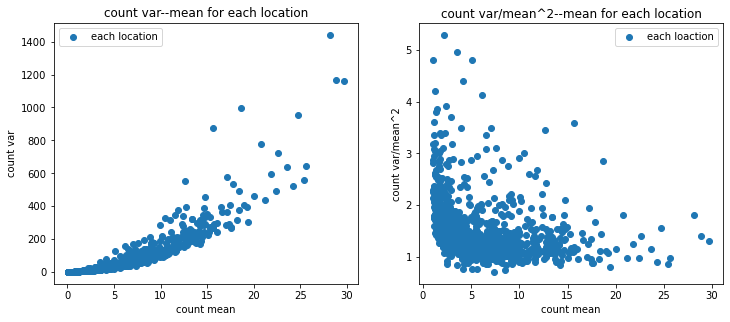

In [27]:

intensity = pd.DataFrame({'mean_geo':cyc_M.apply(np.mean,axis=0), 'var_geo':cyc_M.apply(np.var,axis=0)})
plt.figure(figsize=(12,4.8))
plt.subplot(121)
plt.title('count var--mean for each location')
plt.scatter(intensity['mean_geo'],intensity['var_geo'], label='each location')
plt.legend()
plt.xlabel('count mean')
plt.ylabel('count var')

plt.subplot(122)
plt.title('count var/mean^2--mean for each location')
plt.scatter(intensity['mean_geo'][intensity['mean_geo']>1],intensity['var_geo'][intensity['mean_geo']>1]/(intensity['mean_geo'][intensity['mean_geo']>1])**2, label='each loaction')
plt.xlabel('count mean')
plt.ylabel('count var/mean^2')
plt.legend()
plt.show()

### 各小时：地区平均、方差

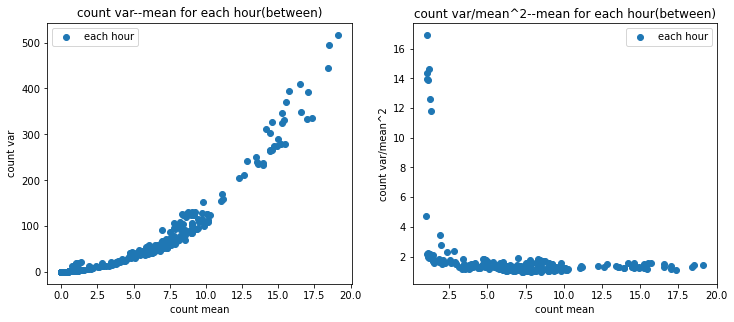

In [28]:
intensity = pd.DataFrame({'mean_hour':cyc_M.apply(np.mean,axis=1), 'var_hour':cyc_M.apply(np.var,axis=1)})
plt.figure(figsize=(12,4.8))
plt.subplot(121)
plt.title('count var--mean for each hour(between)')
plt.scatter(intensity['mean_hour'],intensity['var_hour'], label='each hour')
plt.legend()
plt.xlabel('count mean')
plt.ylabel('count var')

plt.subplot(122)
plt.title('count var/mean^2--mean for each hour(between)')
plt.scatter(intensity['mean_hour'][intensity['mean_hour']>1],intensity['var_hour'][intensity['mean_hour']>1]/(intensity['mean_hour'][intensity['mean_hour']>1])**2, label='each hour')
plt.xlabel('count mean')
plt.ylabel('count var/mean^2')
plt.legend()
plt.show()

In [29]:
cyc_M_copy = cyc_M.copy()
cyc_M_copy.head()

,wx4ehu,wx4fbu,wx4geh,wx4dzx,wx4dvh,wx4g34,wx4g48,wx4ets,wx4dmz,wx4enk,...,wx4ejk,wx4g81,wx4epq,wx4ekf,wx4dyw,wx4dy2,wx4g6d,wx4g0c,wx4ep8,wx4f8w
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
2017-05-10 01:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


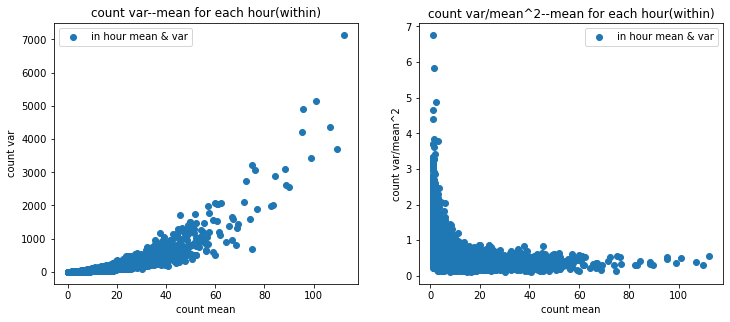

In [30]:
hour = cyc_M_copy.index.hour
cyc_M_copy = pd.concat([cyc_M_copy, pd.DataFrame(hour, index=cyc_M_copy.index)], axis = 1)
cyc_M_copy_columns = list(cyc_M.columns)
cyc_M_copy_columns.append('hour')
cyc_M_copy.columns = cyc_M_copy_columns
cyc_M_copy.head()
hour_mean = cyc_M_copy.groupby(by='hour').mean()
hour_var = cyc_M_copy.groupby(by='hour').var()

plt.figure(figsize=(12,4.8))
plt.subplot(121)
plt.title('count var--mean for each hour(within)')
plt.scatter(hour_mean,hour_var, label='in hour mean & var')
plt.legend()
plt.xlabel('count mean')
plt.ylabel('count var')

plt.subplot(122)
plt.title('count var/mean^2--mean for each hour(within)')
plt.scatter(hour_mean[hour_mean>1],hour_var[hour_mean>1]/(hour_mean[hour_mean>1]**2), label='in hour mean & var')
plt.xlabel('count mean')
plt.ylabel('count var/mean^2')
plt.legend()
plt.show()

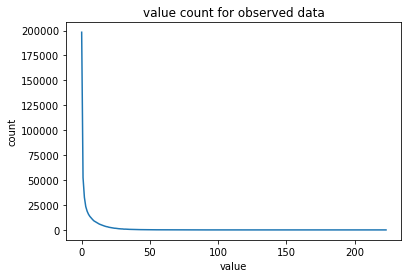

In [31]:
# 对所有出现的观测，进行频数统计
def hist(data, area_list):
    rst=data[area_list[0]].value_counts()
    for area in area_list[1:]:        
        rst=rst.add(data[area].value_counts(),fill_value=0)
                
    return rst
            
cyc_hist = hist(cyc_M, cyc_M.columns)
plt.title('value count for observed data')
plt.plot(cyc_hist)
plt.xlabel('value')
plt.ylabel('count')
plt.show()

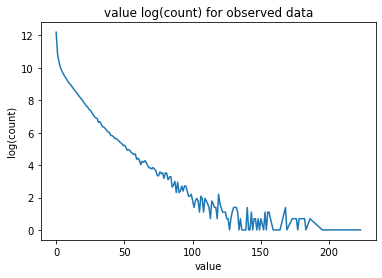

In [32]:
plt.title('value log(count) for observed data')
plt.plot(cyc_hist.index,np.log(cyc_hist))
plt.xlabel('value')
plt.ylabel('log(count)')
plt.show()

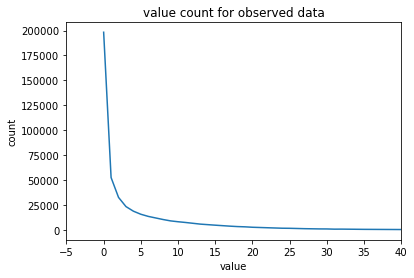

In [33]:
cyc_hist = hist(cyc_M, cyc_M.columns)
plt.title('value count for observed data')
plt.plot(cyc_hist)
plt.xlim((-5,40))
plt.xlabel('value')
plt.ylabel('count')
plt.show()

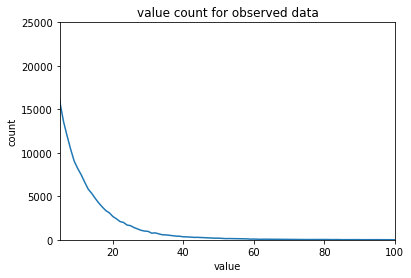

In [35]:
cyc_hist = hist(cyc_M, cyc_M.columns)
plt.title('value count for observed data')
plt.plot(cyc_hist)
plt.ylim((0,25000))
plt.xlim((5,100))
plt.xlabel('value')
plt.ylabel('count')
plt.show()

In [90]:
count_geo = np.sum(cyc_M, axis=0)
count_geo

wx4dqy     208.0
wx4f78    1065.0
wx4g2x     674.0
wx4g31    1227.0
wx4gd9    4409.0
           ...  
wx4g28    3285.0
wx4g9u       6.0
wx4gk0     669.0
wx4gs4      79.0
wx4g5g    1504.0
Length: 1314, dtype: float64

In [91]:
geo_list_bj_center

,lat,lon
wx4dqy,39.806213,116.317749
wx4f78,39.773254,116.526489
wx4g2x,39.987488,116.394653
wx4g31,39.954529,116.416626
wx4gd9,39.998474,116.482544
...,...,...
wx4g28,39.949036,116.394653
wx4g9u,40.014954,116.449585
wx4gk0,39.949036,116.548462
wx4gs4,40.003967,116.548462


In [94]:
count_ = geo_list_bj_center.copy()
count_['count'] = count_geo
count_

,lat,lon,count
wx4dqy,39.806213,116.317749,208.0
wx4f78,39.773254,116.526489,1065.0
wx4g2x,39.987488,116.394653,674.0
wx4g31,39.954529,116.416626,1227.0
wx4gd9,39.998474,116.482544,4409.0
...,...,...,...
wx4g28,39.949036,116.394653,3285.0
wx4g9u,40.014954,116.449585,6.0
wx4gk0,39.949036,116.548462,669.0
wx4gs4,40.003967,116.548462,79.0


In [104]:
import folium
from folium import plugins
beijing=[39.9173,116.3971]

m = folium.Map(beijing, zoom_start=11)

# mark each station as a point
'''
for index, row in subset_cyc.iterrows():
    folium.CircleMarker([row['lat_cen'], row['lon_cen']],
                        radius=10
                       ).add_to(m)
'''

intensity_count = count_.values
intensity_count[np.isnan(intensity_count)] = 0
# plot heatmap
m.add_child(plugins.HeatMap(intensity_count, radius=10))

In [111]:
m1 = folium.Map(beijing, zoom_start=11)
m1

## Select time period

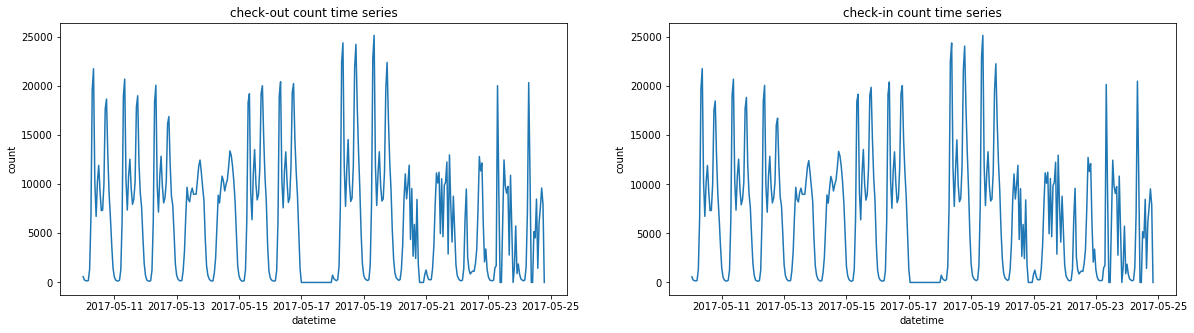

In [16]:
temp_total1 = cyc_M.apply(np.sum,axis=1)
temp_total2 = cyc_M2.apply(np.sum,axis=1)
plt.figure(figsize=[20,5])
plt.subplot(121)
plt.title('check-out count time series')
plt.plot(temp_total1)
plt.xlabel('datetime')
plt.ylabel('count')

plt.subplot(122)
plt.title('check-in count time series')
plt.plot(temp_total2)
plt.xlabel('datetime')
plt.ylabel('count')
plt.show()

In [17]:
np.shape(cyc_M)

(356, 1314)

In [28]:
# select day
day = cyc_M.index.day
day2 = cyc_M2.index.day
cyc_M_select = cyc_M[(day==10)|(day==11)|(day==12)|(day==15)|(day==16)|(day==18)|(day==19)]
cyc_M_select2 = cyc_M2[(day2==10)|(day2==11)|(day2==12)|(day2==15)|(day2==16)|(day2==18)|(day2==19)]

# select hour, in order to make row number of each matrix's match
cyc_M_select = cyc_M_select[1:]

# select common columns (geo location)
common_col = cyc_M_select.columns & cyc_M_select2.columns
cyc_M_select = cyc_M_select[common_col]
cyc_M_select2 = cyc_M_select2[common_col]

In [29]:
cyc_M_select

,wx4dqy,wx4f78,wx4g2x,wx4g31,wx4gd9,wx4f3z,wx4dwj,wx4fbv,wx4ep2,wx4g0k,...,wx4g75,wx4g04,wx4emu,wx4em7,wx4fcu,wx4g28,wx4g9u,wx4gk0,wx4gs4,wx4g5g
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 05:00:00,0.0,0.0,0.0,2.0,3.0,2.0,5.0,0.0,3.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-19 19:00:00,1.0,1.0,4.0,7.0,48.0,12.0,14.0,3.0,26.0,10.0,...,6.0,23.0,9.0,4.0,11.0,16.0,0.0,8.0,0.0,11.0
2017-05-19 20:00:00,0.0,0.0,4.0,6.0,32.0,3.0,10.0,4.0,21.0,4.0,...,9.0,18.0,3.0,4.0,13.0,16.0,0.0,8.0,0.0,8.0
2017-05-19 21:00:00,3.0,2.0,2.0,2.0,16.0,5.0,13.0,3.0,20.0,1.0,...,6.0,11.0,3.0,0.0,18.0,12.0,0.0,1.0,0.0,5.0


In [30]:
cyc_M_select2

,wx4dqy,wx4f78,wx4g2x,wx4g31,wx4gd9,wx4f3z,wx4dwj,wx4fbv,wx4ep2,wx4g0k,...,wx4g75,wx4g04,wx4emu,wx4em7,wx4fcu,wx4g28,wx4g9u,wx4gk0,wx4gs4,wx4g5g
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-19 19:00:00,0.0,1.0,9.0,4.0,27.0,10.0,42.0,6.0,52.0,10.0,...,19.0,33.0,10.0,2.0,24.0,26.0,0.0,12.0,1.0,13.0
2017-05-19 20:00:00,0.0,0.0,7.0,3.0,21.0,13.0,20.0,7.0,29.0,5.0,...,17.0,8.0,10.0,5.0,26.0,12.0,0.0,9.0,0.0,12.0
2017-05-19 21:00:00,1.0,1.0,5.0,7.0,16.0,2.0,12.0,4.0,22.0,3.0,...,23.0,10.0,2.0,5.0,11.0,13.0,0.0,7.0,0.0,6.0


## Contingency table independence test

In [60]:
import statsmodels.api as sm

table = sm.stats.Table(cyc_M_select)
res = table.test_nominal_association()
print(res.pvalue)

0.0


Since the p-value is 0, we reject the null hypothesis and make the conclusion that row and column are not independent

In [61]:
print(res)

df          217626
pvalue      0.0
statistic   475502.9580086575


## Get the real demand cyc matrix

The data in cyc_M_select2 is the check-in number of last hour, and in cyc_M_select is the check-out number of this hour.

I assume that when the check-out number of this hour is less than 1.5 times of check-in number of last hour, the check-out number reflects the real demand.

In [31]:
real_cyc_index1 = (cyc_M_select < 1.5*cyc_M_select2)
real_cyc_index2 = (cyc_M_select < 2*cyc_M_select2)
real_cyc_index3 = (cyc_M_select < 1*cyc_M_select2)

In [32]:
real_cyc_index1

,wx4dqy,wx4f78,wx4g2x,wx4g31,wx4gd9,wx4f3z,wx4dwj,wx4fbv,wx4ep2,wx4g0k,...,wx4g75,wx4g04,wx4emu,wx4em7,wx4fcu,wx4g28,wx4g9u,wx4gk0,wx4gs4,wx4g5g
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,False,False,False,False,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2017-05-10 02:00:00,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False
2017-05-10 03:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2017-05-10 04:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2017-05-10 05:00:00,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-19 19:00:00,False,True,True,False,False,True,True,True,True,True,...,True,True,True,False,True,True,False,True,True,True
2017-05-19 20:00:00,False,False,True,False,False,True,True,True,True,True,...,True,False,True,True,True,True,False,True,False,True
2017-05-19 21:00:00,False,False,True,True,True,False,True,True,True,True,...,True,True,False,True,False,True,False,True,False,True


In [34]:
real_cyc1 = cyc_M_select[real_cyc_index1]
real_cyc2 = cyc_M_select[real_cyc_index2]
real_cyc3 = cyc_M_select[real_cyc_index3]
real_cyc1[cyc_M_select == 0] = 0
real_cyc2[cyc_M_select == 0] = 0
real_cyc3[cyc_M_select == 0] = 0

In [113]:
real_cyc1

,wx4dqy,wx4f78,wx4g2x,wx4g31,wx4gd9,wx4f3z,wx4dwj,wx4fbv,wx4ep2,wx4g0k,...,wx4g75,wx4g04,wx4emu,wx4em7,wx4fcu,wx4g28,wx4g9u,wx4gk0,wx4gs4,wx4g5g
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 05:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-19 19:00:00,NaN,1.0,4.0,NaN,NaN,12.0,14.0,3.0,26.0,10.0,...,6.0,23.0,9.0,NaN,11.0,16.0,0.0,8.0,0.0,11.0
2017-05-19 20:00:00,0.0,0.0,4.0,NaN,NaN,3.0,10.0,4.0,21.0,4.0,...,9.0,NaN,3.0,4.0,13.0,16.0,0.0,8.0,0.0,8.0
2017-05-19 21:00:00,NaN,NaN,2.0,2.0,16.0,NaN,13.0,3.0,20.0,1.0,...,6.0,11.0,NaN,0.0,NaN,12.0,0.0,1.0,0.0,5.0


In [38]:
nan_rate1 = np.sum(np.sum(real_cyc1.isna()))/(167*1312)
nan_rate2 = np.sum(np.sum(real_cyc2.isna()))/(167*1312)
nan_rate3 = np.sum(np.sum(real_cyc3.isna()))/(167*1312)
print('2.0 nan_rate=%.3f\n1.5 nan_rate=%.3f\n1.0 nan_rate=%.3f'%(nan_rate2, nan_rate1, nan_rate3))

2.0 nan_rate=0.214
1.5 nan_rate=0.262
1.0 nan_rate=0.398


Here we get the incompele matrix.

Before we inplement the matrix factoration method, we should:

(1)Check if the nan happens highly correlated with the location and time series.

(2)Select one parameter from 1.0, 1.5, 2.0

## Is nan rate related to geo-location or time?

### correlation between marginal count and nan rate

In [45]:
# spatial nan rate
spatial_nan1 = np.sum(real_cyc1.isna())/real_cyc1.shape[0]
spatial_nan2 = np.sum(real_cyc2.isna())/real_cyc2.shape[0]
spatial_nan3 = np.sum(real_cyc3.isna())/real_cyc3.shape[0]

# temporal nan rate
temporal_nan1 = np.sum(real_cyc1.isna(), axis=1)/real_cyc1.shape[1]
temporal_nan2 = np.sum(real_cyc2.isna(), axis=1)/real_cyc2.shape[1]
temporal_nan3 = np.sum(real_cyc3.isna(), axis=1)/real_cyc3.shape[1]


In [46]:
spatial_nan1

wx4dqy    0.245509
wx4f78    0.257485
wx4g2x    0.221557
wx4g31    0.233533
wx4gd9    0.347305
            ...   
wx4g28    0.215569
wx4g9u    0.017964
wx4gk0    0.209581
wx4gs4    0.125749
wx4g5g    0.377246
Length: 1312, dtype: float64

In [47]:
temporal_nan1

starttime
2017-05-10 01:00:00    0.084604
2017-05-10 02:00:00    0.081555
2017-05-10 03:00:00    0.070884
2017-05-10 04:00:00    0.085366
2017-05-10 05:00:00    0.387957
                         ...   
2017-05-19 19:00:00    0.153963
2017-05-19 20:00:00    0.158537
2017-05-19 21:00:00    0.158537
2017-05-19 22:00:00    0.119665
2017-05-19 23:00:00    0.111280
Length: 167, dtype: float64

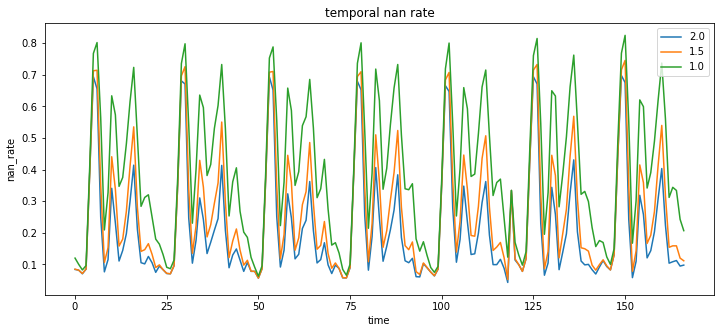

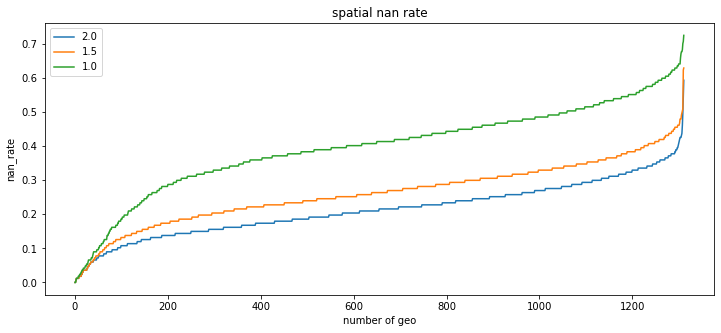

In [48]:
# plot nan rate of spatial-temporal matrix
plt.figure(figsize=[12,5])
plt.title('temporal nan rate')
plt.plot(range(len(temporal_nan2)),temporal_nan2.values, label='2.0')
plt.plot(range(len(temporal_nan1)),temporal_nan1.values, label='1.5')
plt.plot(range(len(temporal_nan3)),temporal_nan3.values, label='1.0')
plt.xlabel('time')
plt.ylabel('nan_rate')
plt.legend()
plt.show()

plt.figure(figsize=[12,5])
plt.title('spatial nan rate')
plt.plot(range(len(spatial_nan2)),np.sort(spatial_nan2), label='2.0')
plt.plot(range(len(spatial_nan1)),np.sort(spatial_nan1), label='1.5')
plt.plot(range(len(spatial_nan3)),np.sort(spatial_nan3), label='1.0')
plt.xlabel('number of geo')
plt.ylabel('nan_rate')
plt.legend()
plt.show()

In [183]:
cyc_M_select.apply(np.sum,axis=1)

starttime
2017-05-10 01:00:00      259.0
2017-05-10 02:00:00      180.0
2017-05-10 03:00:00      160.0
2017-05-10 04:00:00      198.0
2017-05-10 05:00:00     1334.0
                        ...   
2017-05-19 19:00:00    16610.0
2017-05-19 20:00:00    12320.0
2017-05-19 21:00:00     9476.0
2017-05-19 22:00:00     5317.0
2017-05-19 23:00:00     2404.0
Length: 167, dtype: float64

In [50]:
cyc_M_select.apply(np.sum,axis=1).to_csv(r'D:\thesis\data\tsa.csv')

In [49]:
# 1.5
np.corrcoef(temporal_nan1,cyc_M_select.apply(np.sum,axis=1))

array([[1.        , 0.53648262],
       [0.53648262, 1.        ]])

In [50]:
# 2.0
np.corrcoef(temporal_nan2,cyc_M_select.apply(np.sum,axis=1))

array([[1.        , 0.39963629],
       [0.39963629, 1.        ]])

In [51]:
# 1.0
np.corrcoef(temporal_nan3,cyc_M_select.apply(np.sum,axis=1))

array([[1.        , 0.71539048],
       [0.71539048, 1.        ]])

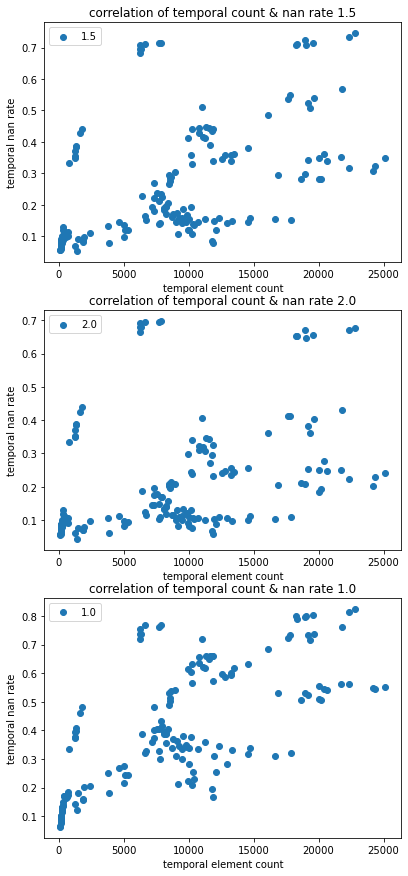

In [52]:
temp_count = cyc_M_select.apply(np.sum,axis=1)

plt.figure(figsize=[6.4, 15])
plt.subplot(311)
plt.title('correlation of temporal count & nan rate 1.5')
plt.scatter(temp_count,temporal_nan1, label='1.5')
plt.xlabel('temporal element count')
plt.ylabel('temporal nan rate')
plt.legend()

plt.subplot(312)
plt.title('correlation of temporal count & nan rate 2.0')
plt.scatter(temp_count,temporal_nan2, label='2.0')
plt.xlabel('temporal element count')
plt.ylabel('temporal nan rate')
plt.legend()

plt.subplot(313)
plt.title('correlation of temporal count & nan rate 1.0')
plt.scatter(temp_count,temporal_nan3, label='1.0')
plt.xlabel('temporal element count')
plt.ylabel('temporal nan rate')
plt.legend()
plt.show()

The above figures show, 

(1) Temporal nan rate is not related to the time series,

(2) In some location, the nan rate is high. So we can discard those locations

In conclusion, I select 1.5,

(1)parameter 1.0 has a relatively high total nan rate.

(2)parameter 2.0 has a significant negative correlation with temporal element count. 

### Chi-2 independence test for nan element

In [53]:
table = sm.stats.Table(real_cyc1.isna())
res = table.test_nominal_association()
print(res.pvalue)

1.0


In [54]:
table = sm.stats.Table(real_cyc2.isna())
res = table.test_nominal_association()
print(res.pvalue)

1.0


In [55]:
table = sm.stats.Table(real_cyc3.isna())
res = table.test_nominal_association()
print(res.pvalue)

1.0


The result is not significant with p-value equals 1.0. We can not deny null hypothesis.

## 导出数据

In [56]:
real_cyc1

,wx4dqy,wx4f78,wx4g2x,wx4g31,wx4gd9,wx4f3z,wx4dwj,wx4fbv,wx4ep2,wx4g0k,...,wx4g75,wx4g04,wx4emu,wx4em7,wx4fcu,wx4g28,wx4g9u,wx4gk0,wx4gs4,wx4g5g
starttime,,,,,,,,,,,,,,,,,,,,,
2017-05-10 01:00:00,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2017-05-10 02:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2017-05-10 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-10 05:00:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-19 19:00:00,NaN,1.0,4.0,NaN,NaN,12.0,14.0,3.0,26.0,10.0,...,6.0,23.0,9.0,NaN,11.0,16.0,0.0,8.0,0.0,11.0
2017-05-19 20:00:00,0.0,0.0,4.0,NaN,NaN,3.0,10.0,4.0,21.0,4.0,...,9.0,NaN,3.0,4.0,13.0,16.0,0.0,8.0,0.0,8.0
2017-05-19 21:00:00,NaN,NaN,2.0,2.0,16.0,NaN,13.0,3.0,20.0,1.0,...,6.0,11.0,NaN,0.0,NaN,12.0,0.0,1.0,0.0,5.0


In [57]:
cyc_M_select.to_csv(r'D:\thesis\data\observed.csv')
real_cyc1.to_csv(r'D:\thesis\data\real.csv')